In [6]:
!pip install wordcloud


  Using cached wordcloud-1.9.2.tar.gz (222 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [29 lines of output]
  Traceback (most recent call last):
    File "C:\Users\Yasserkm\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
      main()
    File "C:\Users\Yasserkm\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
      json_out['return_val'] = hook(**hook_input['kwargs'])
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\Yasserkm\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 118, in get_requires_for_build_wheel
      return hook(config_settings)
             ^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\Yasserkm\AppData\Local\Temp\pip-build-env-fdwocyno\overlay\Lib\site-packages\setupto

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ast 
from collections import Counter


In [25]:
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

In [26]:
movies.head(3)

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   

                                production_companies  \
0  [{"name": "Ingenious Film Partners", "id": 289...   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...   

                                production_countries release_date     revenue  \
0  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10  2787965087   
1  [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   961000000   
2  [{"iso_3166_1": "GB", "name": "United Kingdom"...   2015-10-26   880674609   

   runtime                                   spoken_languages    status  \
0    162.0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1    169.0           [{"iso_639_1": "en", "name": "English"}]  Released   
2    148.0  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   

                                      title  vote_average  vote_count  
0                                    Avatar           7.2       11800  
1  Pirates of the Caribbean: At World's End           6.9        4500  
2                                   Spectre           6.3        4466

In [27]:
credits.head()

movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  
4  [{"credit_id": "52fe479ac3a36847f813eaa3", "de...

In [28]:
print("Shape of movies dataset:",movies.shape)
print("Shape of credits dataset:",credits.shape)

Shape of movies dataset: (4803, 20)
Shape of credits dataset: (4803, 4)


In [29]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [30]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


## Q1: Combine the two datsets as one dataframe

In [32]:
compined = [movies, credits]
df = pd.concat(compined)
display(df)
df.info()

budget                                             genres  \
0     237000000.0  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1     300000000.0  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2     245000000.0  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3     250000000.0  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4     260000000.0  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
...           ...                                                ...   
4798          NaN                                                NaN   
4799          NaN                                                NaN   
4800          NaN                                                NaN   
4801          NaN                                                NaN   
4802          NaN                                                NaN   

                                          homepage        id  \
0                      http://www.avatarmovie.com/   19995.0   
1     http://disney.go.com/disneypictures/pirates/     285.0   
2      http://www.sonypictures.com/movies/spectre/  206647.0   
3               http://www.thedarkknightrises.com/   49026.0   
4             http://movies.disney.com/john-carter   49529.0   
...                                            ...       ...   
4798                                           NaN       NaN   
4799                                           NaN       NaN   
4800                                           NaN       NaN   
4801                                           NaN       NaN   
4802                                           NaN       NaN   

                                               keywords original_language  \
0     [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1     [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2     [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
3     [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
4     [{"id": 818, "name": "based on novel"}, {"id":...                en   
...                                                 ...               ...   
4798                                                NaN               NaN   
4799                                                NaN               NaN   
4800                                                NaN               NaN   
4801                                                NaN               NaN   
4802                                                NaN               NaN   

                                original_title  \
0                                       Avatar   
1     Pirates of the Caribbean: At World's End   
2                                      Spectre   
3                        The Dark Knight Rises   
4                                  John Carter   
...                                        ...   
4798                                       NaN   
4799                                       NaN   
4800                                       NaN   
4801                                       NaN   
4802                                       NaN   

                                               overview  popularity  \
0     In the 22nd century, a paraplegic Marine is di...  150.437577   
1     Captain Barbossa, long believed to be dead, ha...  139.082615   
2     A cryptic message from Bond’s past sends him o...  107.376788   
3     Following the death of District Attorney Harve...  112.312950   
4     John Carter is a war-weary, former military ca...   43.926995   
...                                                 ...         ...   
4798                                                NaN         NaN   
4799                                                NaN         NaN   
4800                                                NaN         NaN   
4801                                                NaN         NaN   
4802                                                NaN         NaN   

<class 'pandas.core.frame.DataFrame'>
Index: 9606 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   float64
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   float64
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   float64
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status                4803

## Q2: Remove the following columns:
- 'homepage','tagline','id','overview','status','original_title','movie_id'.

In [33]:
df = df.drop(['homepage','tagline','id','overview','status','original_title','movie_id'], axis=1)

In [35]:
df.head(3)

budget                                             genres  \
0  237000000.0  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000.0  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000.0  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   

   popularity                               production_companies  \
0  150.437577  [{"name": "Ingenious Film Partners", "id": 289...   
1  139.082615  [{"name": "Walt Disney Pictures", "id": 2}, {"...   
2  107.376788  [{"name": "Columbia Pictures", "id": 5}, {"nam...   

                                production_countries release_date  \
0  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10   
1  [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   
2  [{"iso_3166_1": "GB", "name": "United Kingdom"...   2015-10-26   

        revenue  runtime                                   spoken_languages  \
0  2.787965e+09    162.0  [{"iso_639_1": "en", "name": "English"}, {"iso...   
1  9.610000e+08    169.0           [{"iso_639_1": "en", "name": "English"}]   
2  8.806746e+08    148.0  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...   

                                      title  vote_average  vote_count cast  \
0                                    Avatar           7.2     11800.0  NaN   
1  Pirates of the Caribbean: At World's End           6.9      4500.0  NaN   
2                                   Spectre           6.3      4466.0  NaN   

  crew  
0  NaN  
1  NaN  
2  NaN

## Q3: Create Genres dataframe that hase two coulumns Genres and Frequency
- Hint: Use Counter to calculate Frequency
- Add new catagory to Genres called Others when the Frequency < 200

In [60]:
gens{
    'Action':0,
    'Comedy':0,
    'Adventure':0,
    'Fantasy':0,
    'Science Fiction':0,
    'Crime':0,
    'Drama':0,
    'Thriller':0,
    'Animation':0,
    'Family':0,
    'Romance':0,
    'Animation':0,
    'Mystery':0,
    'Horror':0,
    'Others':0
}
for i in df.index:
    for j in i
        if j=='Action'
     

SyntaxError: invalid syntax (236794335.py, line 1)

In [55]:
df['genres'].unique()

array(['[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]',
       '[{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}]',
       '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 80, "name": "Crime"}]',
       ...,
       '[{"id": 10769, "name": "Foreign"}, {"id": 53, "name": "Thriller"}]',
       '[{"id": 35, "name": "Comedy"}, {"id": 18, "name": "Drama"}, {"id": 10749, "name": "Romance"}, {"id": 10770, "name": "TV Movie"}]',
       nan], dtype=object)

## Q4: Use bar chart draws the relationship between genres of movies and Frequency.
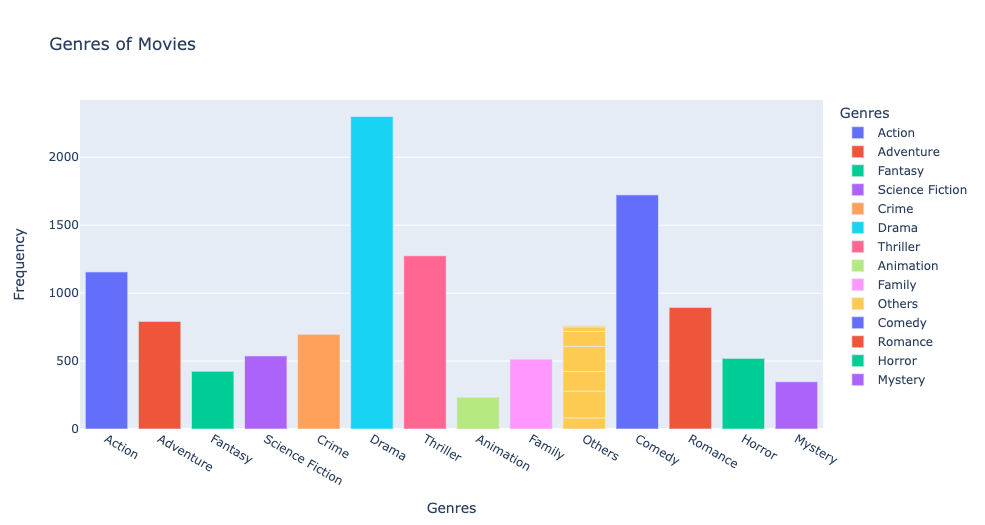

In [ ]:
px.bar(Genres, x='Genres', y='Frequency', title='Genres of Movies ')
fig.show(

## Q5: Use pie chart to draw top 5 languages.
- Hint: use counter to create dataframe contains production_countries with Frequencies.
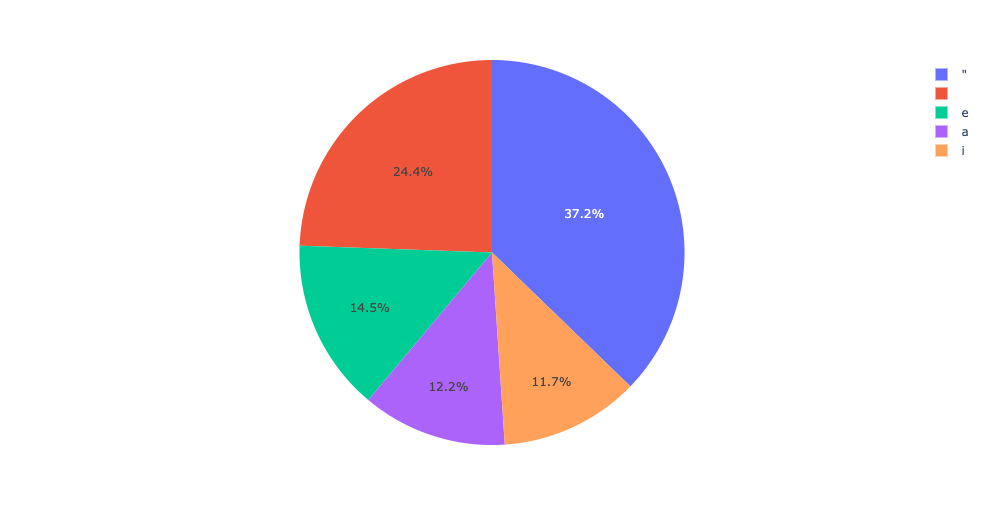

In [ ]:
fig = px.pie(df, values='Frequency', names='Languages')
fig.show()

## Q6: Use WordCloud to draw genres.

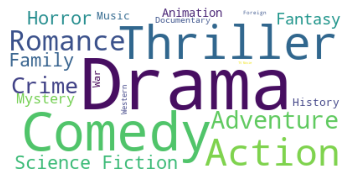

In [22]:
#my python vertion does =n't support wordCloud

## Q7: Use scatter plot to draw the relationship between budget and revenue.
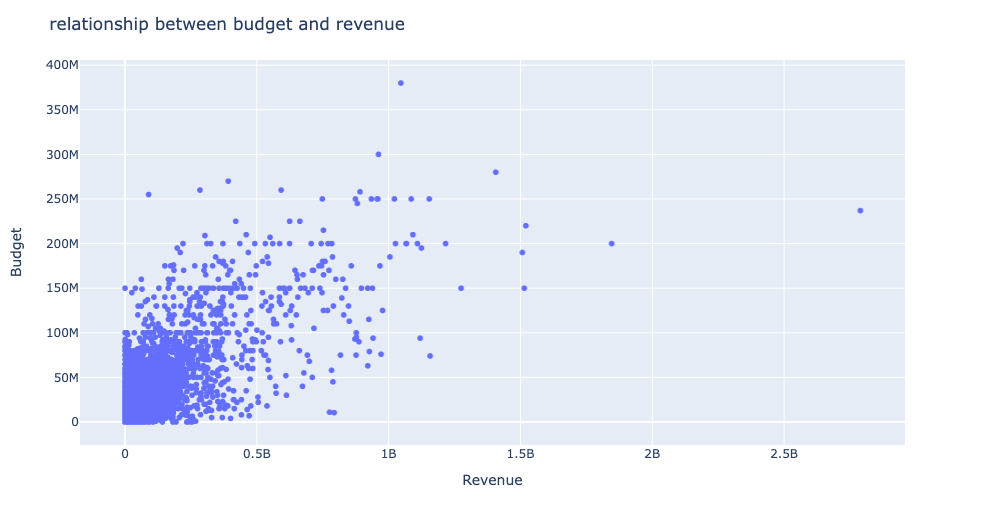

In [ ]:
fig = px.scatter(df, x='Budget', y='Revenue', title='relationship between budget and revenue')
fig.show()

## Q8: Use line chart to draw the relationship between revenue and popularity.
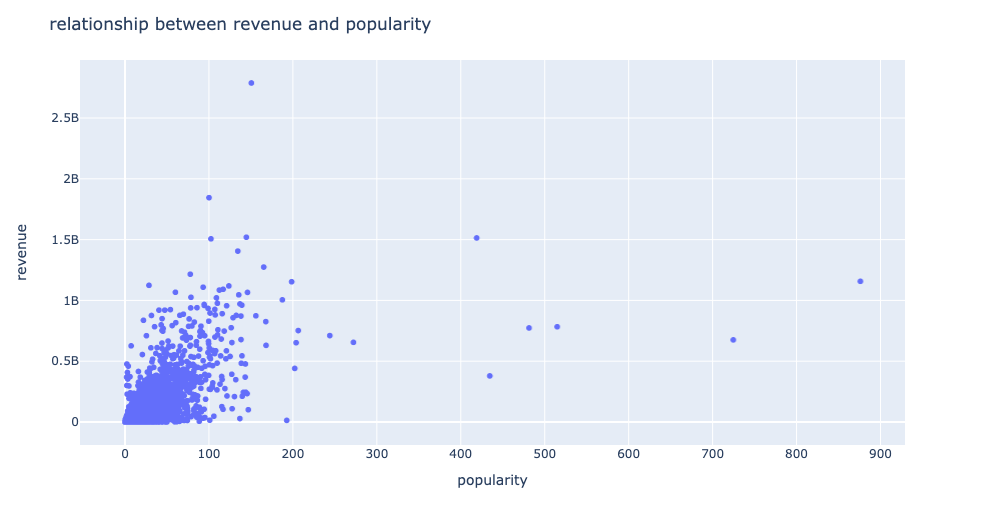

In [ ]:
fig = px.line(df, x=df.index, y=['Revenue', 'Popularity'], title='relationship between revenue and popularity')
fig.show()
